# **Face Mask Detection with YOLOv5**

## **Step 1: Clone YOLOv5 github repository and install dependencies**

In [ ]:
# clone YOLOv5 repo
!git clone https://github.com/ultralytics/yolov5

In [ ]:
# install dependencies
!pip install -U -r yolov5/requirements.txt

## **Step 2: Prepare data**

### **2.1. Download data**
- download dataset zip file from dropbox link
- unzip it to target folder ("/content/dataset")

In [ ]:
# video file download url
DATASET_URL = 'https://www.dropbox.com/s/ixvs04fak2ttb35/dataset.zip?dl=0'

# create folder to store our dataset
DATASET_FOLDER = '/content/dataset'
os.makedirs(DATASET_FOLDER, exist_ok = True)

# download dataset zip file
DATASET_ZIP_FILE = '/content/dataset.zip'
!wget -O {DATASET_ZIP_FILE} {DATASET_URL}

# unzip dataset zip file to folder
!unzip -u {DATASET_ZIP_FILE} -d {DATASET_FOLDER}

# remove dataset zip file
!rm {DATASET_ZIP_FILE}

###**2.2. Remove "incorrectly worn" class**
- There are only a few samples for "Incorrectly Worn" class in the dataset. 
- We will convert it to "No Mask" class.

In [ ]:
import glob
import os
import re

for folder in ['train', 'valid']:
    file_list = os.listdir(f'{dataset_dir}/{folder}/labels')
    for file in file_list:
        if not file.endswith('.txt'):
            continue
        with open(f'{dataset_dir}/{folder}/labels/{file}', 'r+') as f:
            lines = f.read()
            replaced = re.sub(r'0(?=\s\d+\.\d+){4}', '1', lines)
            replaced = re.sub(r'2(?=\s\d+\.\d+){4}', '0', lines)
            f.seek(0)
            f.write(replaced)
            f.truncate()

###**2.3. Visualize sample data**

In [ ]:
!git clone https://github.com/Aye-Nyein-Thaw/The-Sparks-Foundation-Internship.git

In [ ]:
# add project folder path to sys.path
import sys

project_dir = '/content/The-Sparks-Foundation-Internship/Face Mask Detection YOLOv5/'
sys.path.insert(0, project_dir)

print(sys.path)

- **class 0: 'no mask' or 'incorrectly worn mask'**
- **class 1: 'mask worn correctly'**

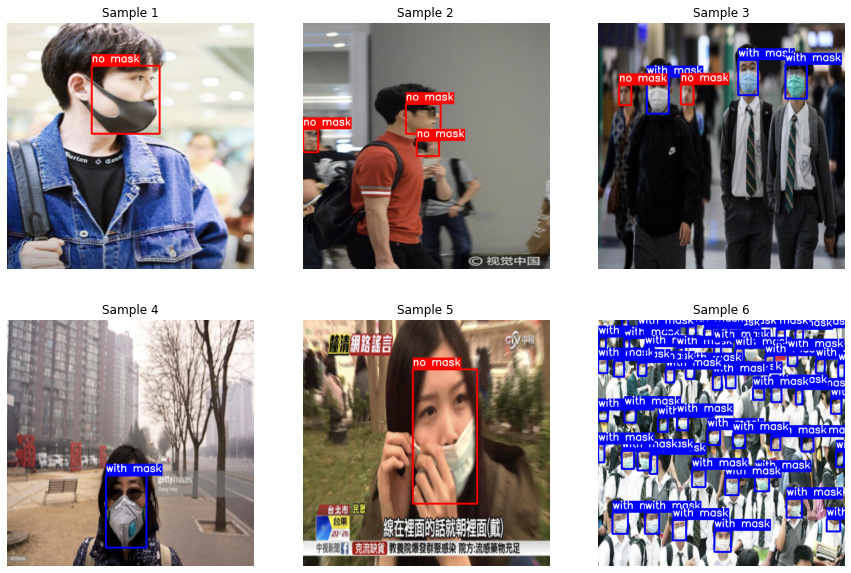

In [ ]:
# import utils.py from this repo - https://github.com/Aye-Nyein-Thaw/The-Sparks-Foundation-Internship.git
import utils

# Text for each class
text_map = {0 : 'no mask', 
            1 : 'with mask'}

# RGB color values for each class
color_map = {0 : (255,0,0),  # red for class 0
             1 : (0,0,255)}  # blue for class 1

utils.plot_sample_images(dataset_dir,
                   split = 'valid', # train (or) valid
                   color_map = color_map, 
                   text_map = text_map,
                   rows = 2,
                   columns = 3)

## **Step 3: Create data.yaml file**

In [ ]:
import yaml

data_yaml = dict(
    train = f'{dataset_dir}/train/',
    val = f'{dataset_dir}/valid/',
    nc = 2,
    names = ['no mask', 'with mask']
)

yaml_dir = '/content/data.yaml'

# write data.yaml file to 'content/' directory
with open(yaml_dir, 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)
    
%cat /content/data.yaml

## **Step 4: Train YOLOv5 model**

In [ ]:
IMG_SIZE = 640
BATCH_SIZE = 32
EPOCHS = 50
project_folder = '/content/face-mask-detection'

In [ ]:
!python /content/yolov5/train.py --img {IMG_SIZE} \
                 --batch {BATCH_SIZE} \
                 --epochs {EPOCHS} \
                 --data {yaml_dir} \
                 --weights yolov5s.pt \
                 --save_period 1 \
                 --project {project_folder}

In [ ]:
log_dir = f'{project_folder}/exp'

%load_ext tensorboard
%tensorboard --logdir {log_dir}

## **Step 5: Save weights and training output folder in a zip file**
- save training output folder as zip file and download

In [ ]:
#training_output_folder = f'/content/{project_name}/'
zip_file = '/content/training_outputs.zip'

# save training output files in a zip file
!zip -r {zip_file} {project_folder}